# Regression

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Importing data 
about car prices

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Data analisys with pandas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [5]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


#### PAIRPLOT

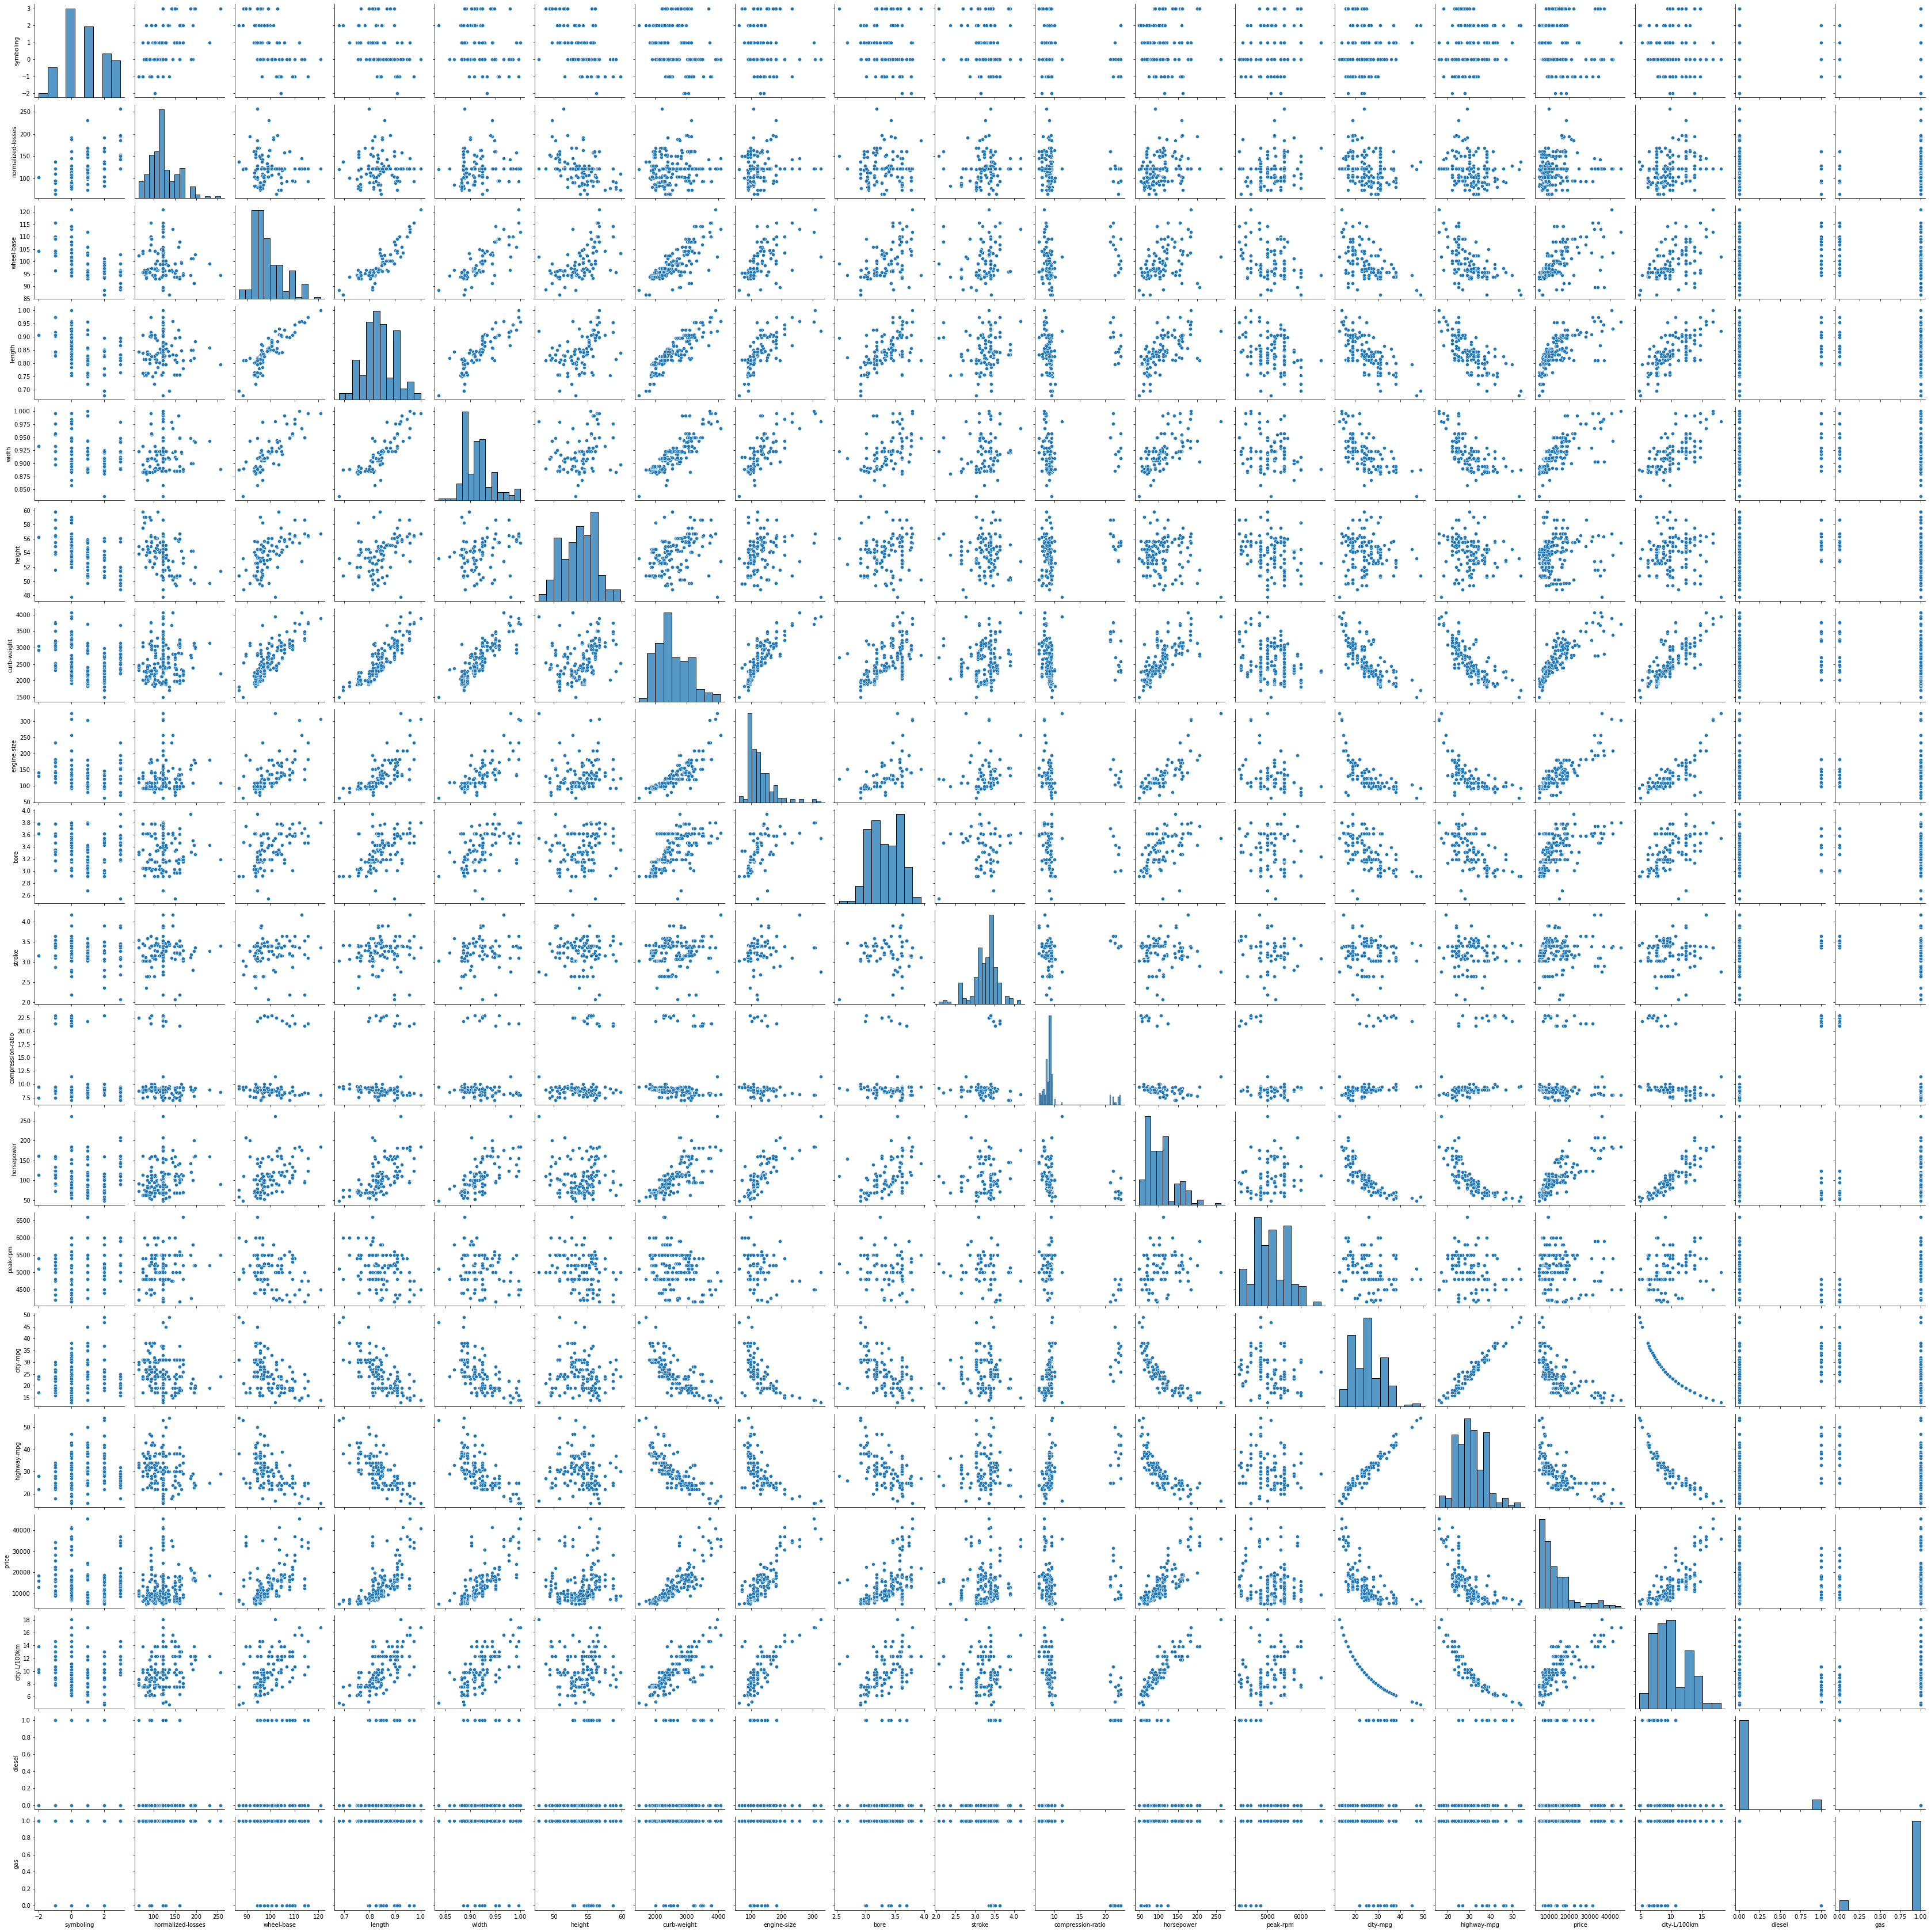

In [6]:
sns.pairplot(df)

There are too much features and the pairplot seems too compex and unreadable.

#### HEATMAP
Plot heatmap - so we can find out wich features are correlated the most. And on wich features out target depends the most

<AxesSubplot:>

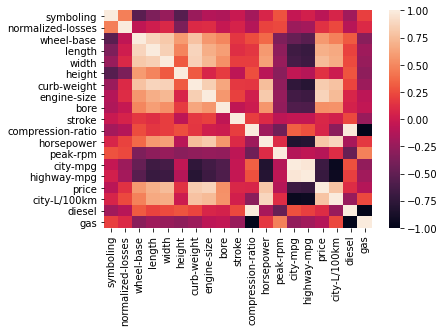

In [12]:
sns.heatmap(df.corr())

Here we can see that the price depends most heavily on engine-size, curb-weight, horsepower, city-mpg and highway-mpg

But also i've noticed that city-mpg and highway-mpg seems to be heavily correlated.

Let's check it by scatter plots and calculate the correlation

,city-mpg,highway-mpg
city-mpg,1.000000,0.972044
highway-mpg,0.972044,1.000000


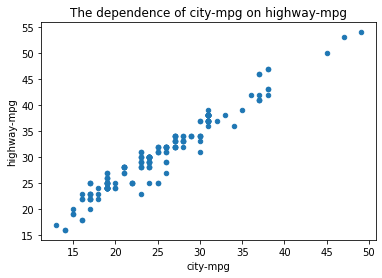

In [24]:
df.plot(x='city-mpg', y='highway-mpg', 
        kind='scatter', 
        title='The dependence of city-mpg on highway-mpg')
plt.plot()
df[['city-mpg', 'highway-mpg']].corr()

These features are realy heavily correlated so we can use only one of them

In [25]:
data = df[['engine-size', 'curb-weight', 'horsepower','highway-mpg', 'price']]
X = df[['engine-size', 'curb-weight', 'horsepower','highway-mpg']]
y = df.price

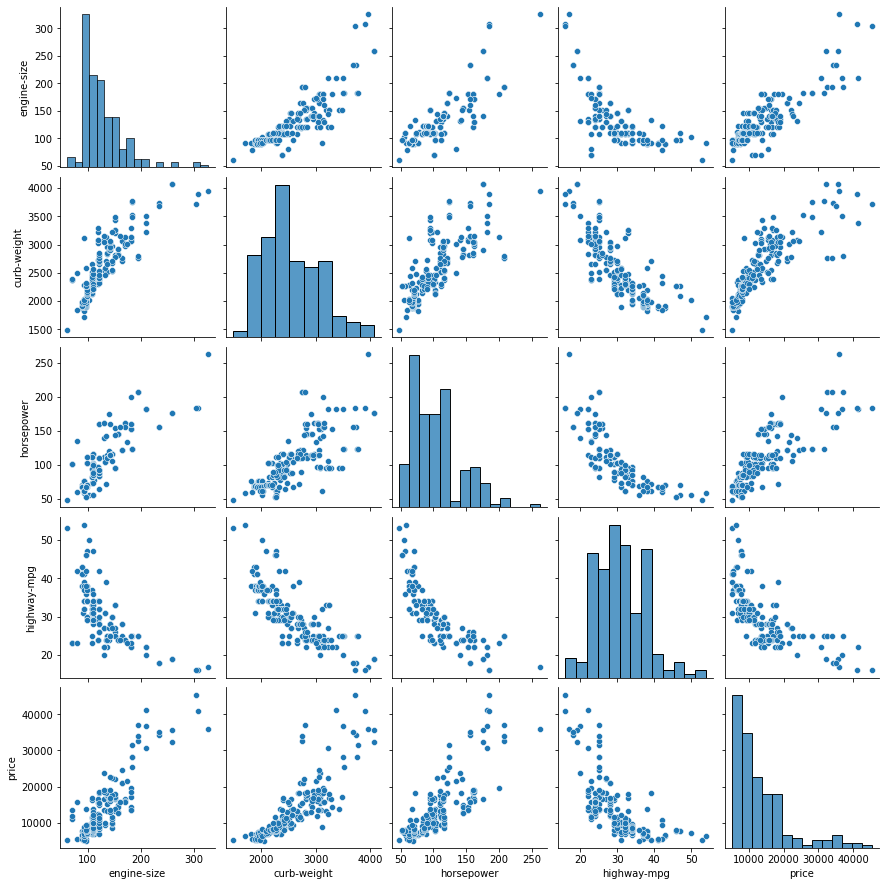

In [26]:
sns.pairplot(data)

### LINEAR REGRESSION

let's create and fit linear regression model

#### engine size and price

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
lm = LinearRegression()

feature = X[['engine-size']]
lm.fit(feature, y)

y_predicted = lm.predict(feature)

In [215]:
result = pd.DataFrame()
result['price'] = y
result['predicted_price'] = pd.DataFrame(data=y_predicted)
result.head()

,price,predicted_price
0,13495.0,13728.463134
1,16500.0,13728.463134
2,16500.0,17399.383479
3,13950.0,10224.402804
4,17450.0,14729.623228


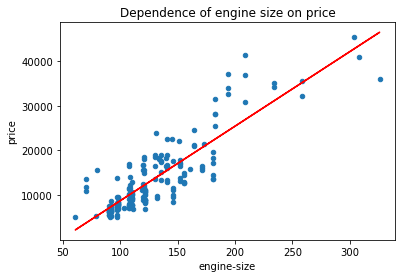

In [216]:
data.plot(x = 'engine-size',
          y = 'price',
          kind = 'scatter',
          title = 'Dependence of engine size on price')
plt.plot(data['engine-size'], y_predicted, color='red')

(0.0, 53478.06932829508)

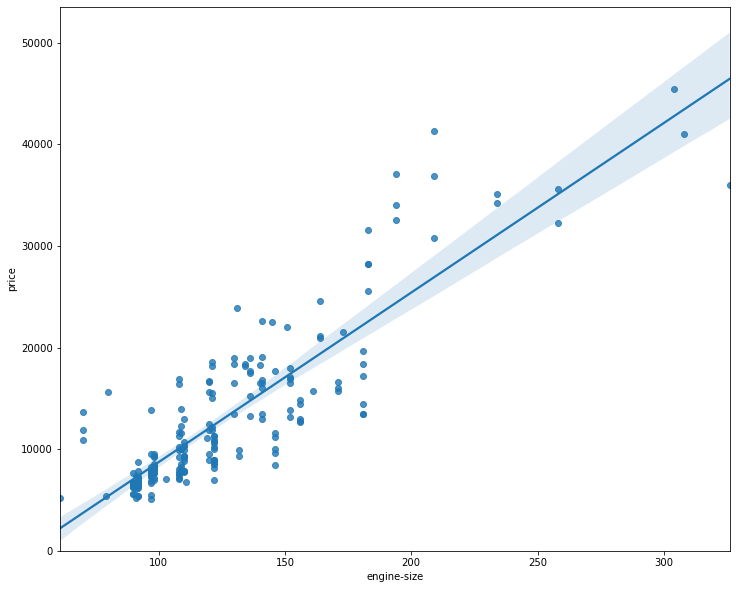

In [217]:
width = 12
height = 10

plt.figure(figsize=(width, height))
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [218]:
r2_linear_engine = lm.score(feature, y)
print('The R-square is: ', lm.score(feature, y))
mse_linear_engine = mean_squared_error(y, y_predicted)
print('The MSE is: ', mse_linear_engine)

The R-square is:  0.7609686443622008
The MSE is:  15021126.02517414


#### highway mpg and price

In [219]:
feature = X[['highway-mpg']]
lm.fit(feature, y)
y_predicted = lm.predict(feature)

In [220]:
result = pd.DataFrame()
result['price'] = y
result['predicted_price'] = pd.DataFrame(data=y_predicted)
result.head()

,price,predicted_price
0,13495.0,16236.504643
1,16500.0,16236.504643
2,16500.0,17058.238022
3,13950.0,13771.304508
4,17450.0,20345.171535


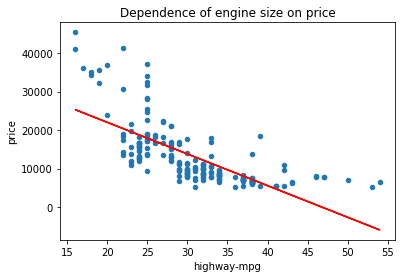

In [221]:
data.plot(x = 'highway-mpg',
          y = 'price',
          kind = 'scatter',
          title = 'Dependence of engine size on price')
plt.plot(data['highway-mpg'], y_predicted, color='red')

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

(0.0, 48180.532273752666)

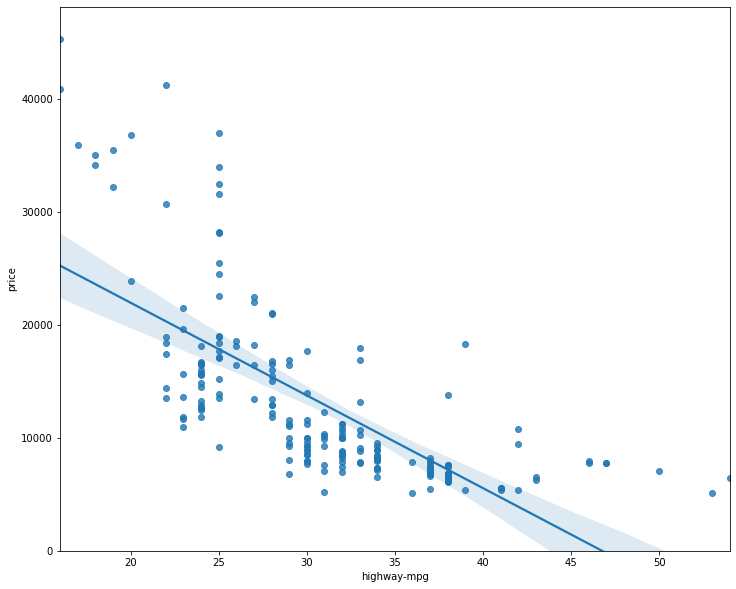

In [222]:
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [223]:
r2_linear_highway = lm.score(feature, y)
print('The R-square is: ', r2_linear_highway)
mse_linear_highway = mean_squared_error(y, y_predicted)
print('The MSE is: ', mse_linear_highway)

The R-square is:  0.4965911884339175
The MSE is:  31635042.944639895


### MULTIPLE LINEAR REGRESSION

In [224]:
X.head()

,engine-size,curb-weight,horsepower,highway-mpg
0,130,2548,111.0,27
1,130,2548,111.0,27
2,152,2823,154.0,26
3,109,2337,102.0,30
4,136,2824,115.0,22


In [225]:
lm.fit(X, y)
y_predicted = lm.predict(X)

In [226]:
result = pd.DataFrame()
result['price'] = y
result['predicted_price'] = pd.DataFrame(data=y_predicted)
result.head()

,price,predicted_price
0,13495.0,13699.111612
1,16500.0,13699.111612
2,16500.0,19051.654702
3,13950.0,10620.361930
4,17450.0,15521.314202


/Users/polinariabar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/polinariabar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


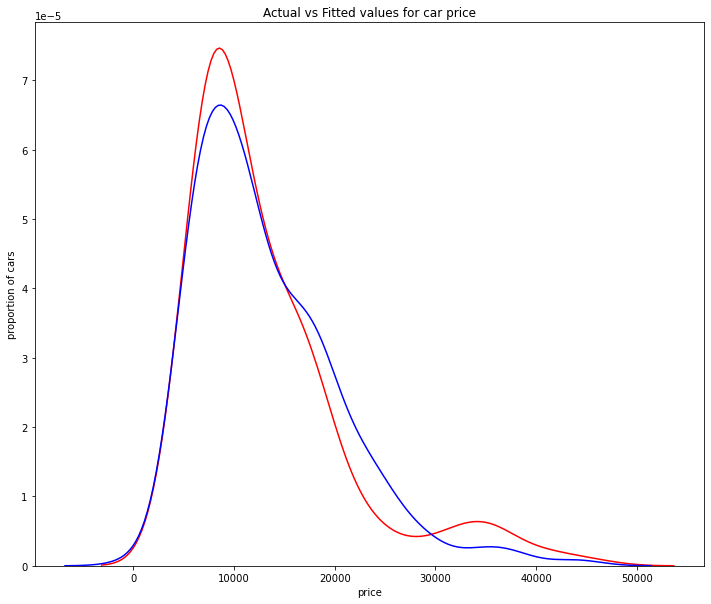

In [227]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y, hist=False, color='red', label='avt value')
sns.distplot(y_predicted, hist=False, color='blue', label='pred value')

plt.title('Actual vs Fitted values for car price')
plt.xlabel('price')
plt.ylabel('proportion of cars')

plt.show()

In [228]:
r2_mult_lin = lm.score(X, y)
print('The R-square is: ', r2_mult_lin)
mse_mult_lin = mean_squared_error(y, y_predicted)
print('The MSE is: ', mse_mult_lin)

The R-square is:  0.8093562806577457
The MSE is:  11980366.87072649


### POLYNOMIAL REGRESSION

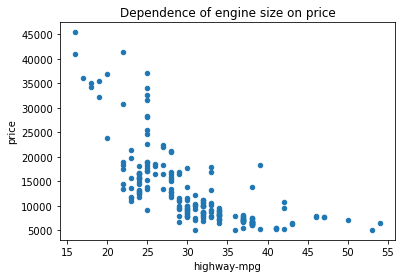

In [229]:
data.plot(x = 'highway-mpg',
          y = 'price',
          kind = 'scatter',
          title = 'Dependence of engine size on price')
plt.show()

In [230]:
def plotPolynomial(model, feature, target, name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(feature, target, '.', x_new, y_new, '-')
    plt.xlabel(name)
    plt.ylabel('Price of Cars')
    
    plt.show()

As we can see, the relation between this feature and a target is nonlinear. And linear regression doesn't suit it.
So we can try to use polynomial regression.

In [231]:
x = df['highway-mpg']

In [232]:
# Polynomial regression of the 2nd order
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

       2
45.35 x - 3773 x + 8.419e+04


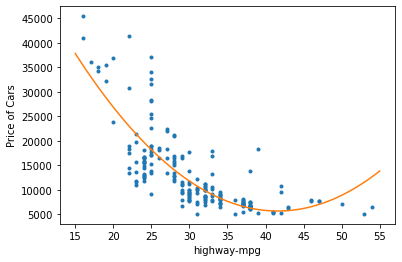

In [233]:
plotPolynomial(p, x, y, 'highway-mpg')

In [234]:
result = pd.DataFrame()
result['price'] = y
result['predicted_price'] = pd.DataFrame(data=p(x))
result.head()

,price,predicted_price
0,13495.0,15376.824115
1,16500.0,15376.824115
2,16500.0,16746.449199
3,13950.0,11812.174101
4,17450.0,23131.991597


In [235]:
r2_poly_2 = r2_score(y, p(x))
print('The R-square is: ', r2_poly_2)
mse_poly_2 = mean_squared_error(y, p(x))
print('The MSE is: ', mse_poly_2)

The R-square is:  0.6517936037026724
The MSE is:  21881866.283181358


In [236]:
# Polynomial regression of the 3rd order

In [237]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


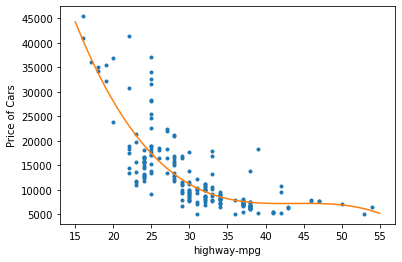

In [239]:
plotPolynomial(p, x, y, 'highway-mpg')

           5         4        3        2
-0.006998 x + 1.223 x - 84.3 x + 2908 x - 5.152e+04 x + 3.954e+05


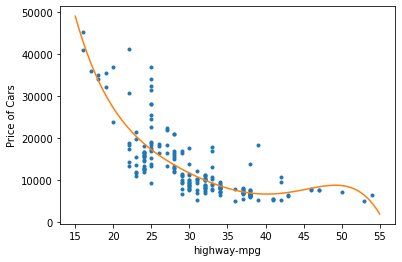

20184311.223404102

In [211]:
f = np.polyfit(x, y, 5)
p = np.poly1d(f)
print(p)
plotPolynomial(p, x, y, 'highway-mpg')
mse_5_order = mean_squared_error(y, p(x))
mse_5_order

In [212]:
r2_poly_3 = r2_score(y, p(x))
print('The R-square is: ', r2_poly_3)
mse_poly_3 = mean_squared_error(y, p(x))
print('The MSE is: ', mse_poly_3)

The R-square is:  0.6788068173943975
The MSE is:  20184311.223404102


### Multivariate Polynomial Regression

In [133]:
from sklearn.preprocessing import PolynomialFeatures

In [134]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [138]:
X_pr = pr.fit_transform(X)
print(X.shape)
print(X_pr.shape)

(201, 4)
(201, 15)


In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [141]:
Input = [('scale', StandardScaler()),
         ('polynomial', PolynomialFeatures(include_bias=False)),
         ('model', LinearRegression())]

In [142]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [143]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [146]:
y_pred_pipe = pipe.predict(X)

In [147]:
result = pd.DataFrame()
result['price'] = y
result['predicted_price'] = pd.DataFrame(data=y_pred_pipe)
result.head()

,price,predicted_price
0,13495.0,13102.747842
1,16500.0,13102.747842
2,16500.0,18225.545722
3,13950.0,10390.296366
4,17450.0,16136.296192


/Users/polinariabar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/polinariabar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


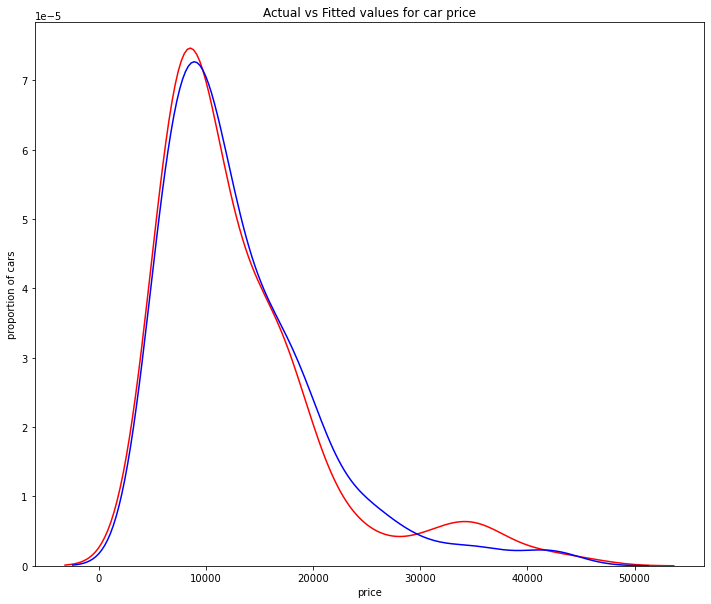

In [153]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y, hist=False, color='red', label='avt value')
sns.distplot(y_pred_pipe, hist=False, color='blue', label='pred value')

plt.title('Actual vs Fitted values for car price')
plt.xlabel('price')
plt.ylabel('proportion of cars')

plt.show()

##### Measures for In-Sample Evaluation

In [154]:
from sklearn.metrics import r2_score

In [157]:
r_squared = r2_score(y, y_pred_pipe)
mse_pipe = mean_squared_error(y, y_pred_pipe)
# this model suits better
print('The R-square value is: ', r_squared)
print('The Mean Squared Error is: ', mse_pipe)

The R-square value is:  0.8463341969864728
The Mean Squared Error is:  9656613.403989598


In [257]:
validation = pd.DataFrame({
    'MSE': [mse_linear_engine, mse_linear_highway, 
            mse_mult_lin, mse_poly_2, mse_poly_3, mse_pipe],
    'R2':  [r2_linear_engine, r2_linear_highway, 
            r2_mult_lin, r2_poly_2, r2_poly_3, r_squared]},
    index = ['lin_engine', 'lin_highway', 'multy', 'poly2', 'poly3', 'pipe'])
validation

,MSE,R2
lin_engine,1.502113e+07,0.760969
lin_highway,3.163504e+07,0.496591
multy,1.198037e+07,0.809356
poly2,2.188187e+07,0.651794
poly3,2.018431e+07,0.678807
pipe,9.656613e+06,0.846334


We can see that the Multivariate Polynomial Regression feets the best